In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full0.5_celeste_stride100_413_5reps')
settings.replicates = 5
settings.gamma_range = (2,10)
settings.train_frac = 0.8
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV


In [3]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [4]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [5]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /home/alexi/Documents/HDXer


In [6]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"



In [7]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [8]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
AVG: ncol = 6, len(names) = 4


In [9]:
print(VDX.rates)

Empty DataFrame
Columns: []
Index: []


In [10]:
print(VDX.paths)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   

   experimental                                          int_rates  
0         False                                                NaN  
1         False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  


In [11]:
SHAW_dir = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein"

dir_list = os.listdir(SHAW_dir)

dcd_list = [i for i in dir_list if i.endswith(".dcd")]
# remove any with small in name
dcd_list = [i for i in dcd_list if not "_str" in i]

dcd_list.sort()
print(dcd_list)
print(len(dcd_list))

['bpti-protein-000.dcd', 'bpti-protein-001.dcd', 'bpti-protein-002.dcd', 'bpti-protein-003.dcd', 'bpti-protein-004.dcd', 'bpti-protein-005.dcd', 'bpti-protein-006.dcd', 'bpti-protein-007.dcd', 'bpti-protein-008.dcd', 'bpti-protein-009.dcd', 'bpti-protein-010.dcd', 'bpti-protein-011.dcd', 'bpti-protein-012.dcd', 'bpti-protein-013.dcd', 'bpti-protein-014.dcd', 'bpti-protein-015.dcd', 'bpti-protein-016.dcd', 'bpti-protein-017.dcd', 'bpti-protein-018.dcd', 'bpti-protein-019.dcd', 'bpti-protein-020.dcd', 'bpti-protein-021.dcd', 'bpti-protein-022.dcd', 'bpti-protein-023.dcd', 'bpti-protein-024.dcd', 'bpti-protein-025.dcd', 'bpti-protein-026.dcd', 'bpti-protein-027.dcd', 'bpti-protein-028.dcd', 'bpti-protein-029.dcd', 'bpti-protein-030.dcd', 'bpti-protein-031.dcd', 'bpti-protein-032.dcd', 'bpti-protein-033.dcd', 'bpti-protein-034.dcd', 'bpti-protein-035.dcd', 'bpti-protein-036.dcd', 'bpti-protein-037.dcd', 'bpti-protein-038.dcd', 'bpti-protein-039.dcd', 'bpti-protein-040.dcd', 'bpti-protein-0

In [12]:
sim_name = "BPTI_SHAW"
top_name = "bpti-protein.pdb"
top_path = os.path.join(SHAW_dir, top_name)
reps = len(dcd_list)
# reps =100

traj_paths = [os.path.join(SHAW_dir, i) for i in dcd_list[:reps]]
print(top_path)
print(traj_paths)


VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein.pdb
['/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-009.dcd', '/home/alexi/Doc

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [13]:
import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly

small_traj_paths = []

for rep in range(len(traj_paths)):
    traj = traj_paths[rep]
    u = mda.Universe(top_path, traj)
    print(u.trajectory.n_frames)

    # sample by stride settings.stide

    small_traj_name = traj.replace(".dcd", f"_str{settings.stride}.dcd")

    # Create an AtomGroup from the Universe's selection
    ag = u.select_atoms('all')

    # write traj
    with DCDWriter(small_traj_name, ag.n_atoms) as writer:
        for ts in u.trajectory[::settings.stride]:
            writer.write(ag)

    small_traj_paths.append(small_traj_name)

10000


10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
1000

In [14]:
print((traj_paths))

['/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-009.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-010.dcd', '/home/al

In [15]:
VDX.load_structures(top_path=top_path, traj_paths=small_traj_paths, calc_name=test_name)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN     BPTI_SHAW   
3                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                      

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [16]:
VDX.paths

,HDX,SEG,calc_name,experimental,int_rates,top,traj
0,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,Experimental,False,NaN,NaN,NaN
1,NaN,NaN,Experimental,False,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,NaN,NaN
2,NaN,NaN,BPTI_SHAW,NaN,NaN,/home/alexi/Documents/DESRES-Trajectory-bpti-p...,[/home/alexi/Documents/DESRES-Trajectory-bpti-...
3,NaN,NaN,MD_Simulated,NaN,NaN,/home/alexi/Documents/DESRES-Trajectory-bpti-p...,[/home/alexi/Documents/DESRES-Trajectory-bpti-...


Random seeds: [42, 43, 44, 45, 46]
Randomly splitting segments for MD_Simulated with random seed 42 and train fraction 0.8
Saved train MD_Simulated segments to /home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  1  2  3  4  5  6  8  9 11 12 13 15 16 17 19 21 23 24 25 26 27 29 30
 31 32 33 34 35 36 37 39 40]
Saved val MD_Simulated segments to /home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_1/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 7 10 14 18 20 22 28 38]
    ResStr  ResEnd    0.167      1.0     10.0    120.0  peptide  \
0       34      35  0.00109  0.00649  0.06306  0.54232       24   
1       22      23  0.00000  0.00000  0.00003  0.00037       13   
2       17      18  0.00028  0.00165  0.01638  0.17975        8   
3       35      36  0.01528  0.08809  0.60233  0.99998       25   
4       11      12  0.99880  1.00000

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000_str100.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001_str100.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002_str100.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003_str100.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004_str100.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005_str100.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006_str100.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007_str100.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008_str100.dcd /home/alexi/Documents/DESRE

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_1/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_1/reweighting_gamma_2x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_1/reweighting_gamma_3x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_1/reweighting_gamma_5x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_

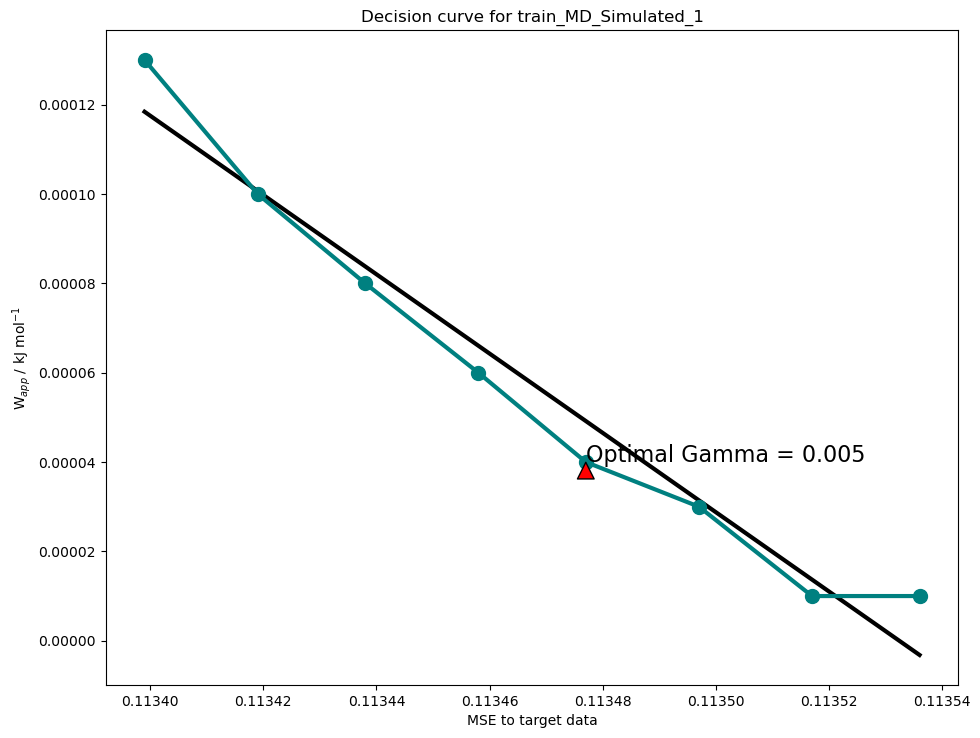

Optimal gamma for train_MD_Simulated_1 is 5x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_1/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00019  0.00116  0.01152  0.12978        0
1  0.00061  0.00366  0.03604  0.35629        1
2  0.02513  0.14136  0.78218  1.00000        2
3  0.00054  0.00323  0.03180  0.32144        3
4  0.99817  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00019  0.00116  0.01152  0.12978        0
1   0.00061  0.00366  0.03604  0.35629        1
2   0.02513  0.14136  0.78218  1.00000        2
3   0.00054  0.00323  0.03180  0.32144        3
4   0.99817  1.00000  1.00000  1.00000        4
5   0.00370  0.02195  0.19905  0.93030        5
6   0.05813  0.30135  0.97229  1.00000        6
7   0.00262  0.01557  0.14526  0.84794        7
8   1.00000  1.00000  1.00000  1.00000        8
9  

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 1
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_1/val_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_1
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_1/out__val_MD_Simulated_1Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_1/reweighting_gamma_2x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_1/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_1/reweighting_gamma_3x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_1/reweighting_gamma_5x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_

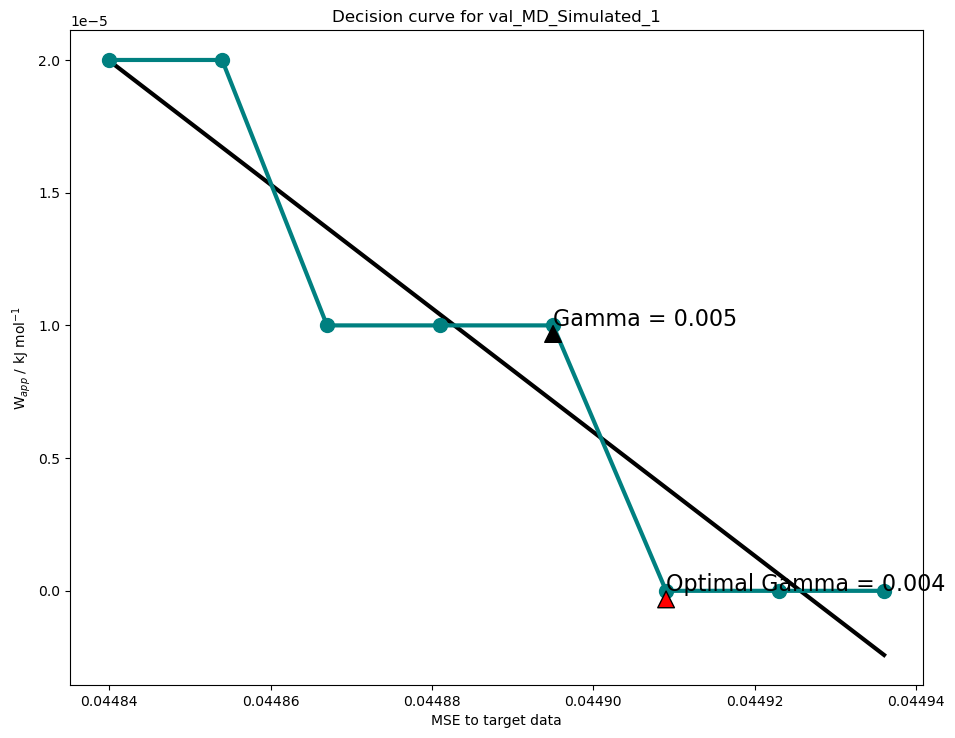

Optimal gamma for val_MD_Simulated_1 is 4x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_1/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.34715  0.92218  1.00000  1.00000        0
1  0.00037  0.00222  0.02196  0.23390        1
2  0.00207  0.01235  0.11688  0.77496        2
3  0.00535  0.03163  0.27485  0.97886        3
4  0.00227  0.01354  0.12742  0.80517        4
     0.167      1.0     10.0    120.0  peptide
0  0.34715  0.92218  1.00000  1.00000        0
1  0.00037  0.00222  0.02196  0.23390        1
2  0.00207  0.01235  0.11688  0.77496        2
3  0.00535  0.03163  0.27485  0.97886        3
4  0.00227  0.01354  0.12742  0.80517        4
5  0.00115  0.00686  0.06649  0.56207        5
6  0.22832  0.78818  1.00000  1.00000        6
7  0.09434  0.44752  0.99735  1.00000        7
     0.167      1.0     10.0    120.0  peptide           calc_nam

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_2
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_2/reweighting_gamma_5x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_2/reweighting_gamma_3x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_2/reweighting_gamma_2x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_2/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_

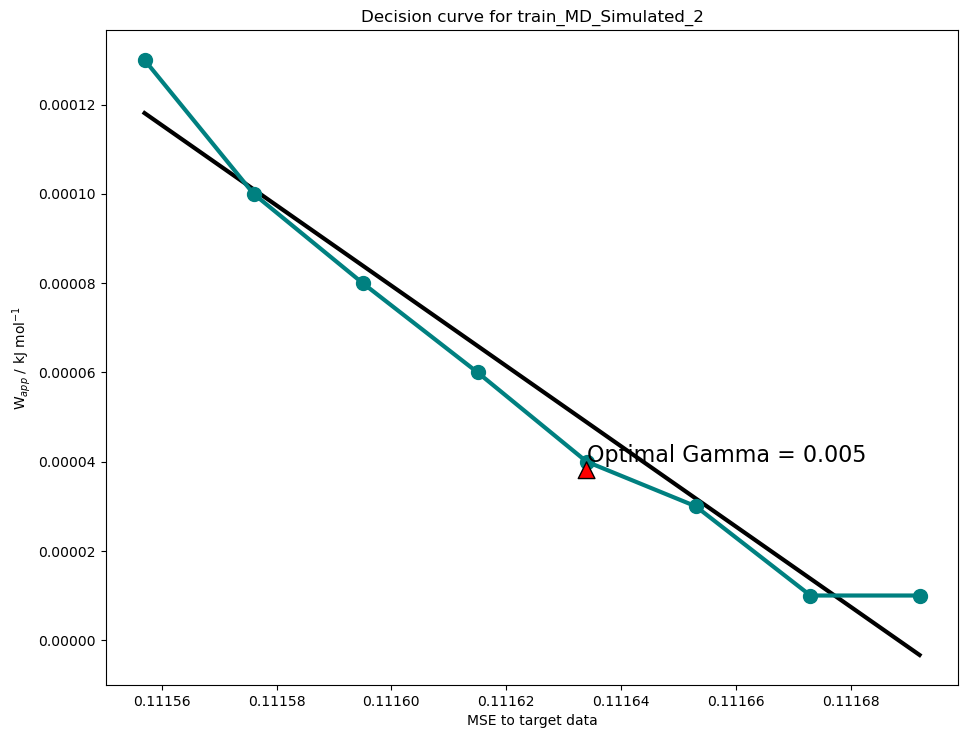

Optimal gamma for train_MD_Simulated_2 is 5x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_2/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00207  0.01236  0.11691  0.77506        0
1  0.96575  1.00000  1.00000  1.00000        1
2  0.00227  0.01355  0.12749  0.80536        2
3  0.31249  0.89392  1.00000  1.00000        3
4  0.91127  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00207  0.01236  0.11691  0.77506        0
1   0.96575  1.00000  1.00000  1.00000        1
2   0.00227  0.01355  0.12749  0.80536        2
3   0.31249  0.89392  1.00000  1.00000        3
4   0.91127  1.00000  1.00000  1.00000        4
5   0.00019  0.00116  0.01152  0.12977        5
6   0.34711  0.92215  1.00000  1.00000        6
7   1.00000  1.00000  1.00000  1.00000        7
8   0.00115  0.00686  0.06653  0.56226        8
9  

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 2
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_2/val_MD_Simulated_2_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_2
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_2/out__val_MD_Simulated_2Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_2/reweighting_gamma_2x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_2/reweighting_gamma_3x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_2/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_2/reweighting_gamma_5x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_

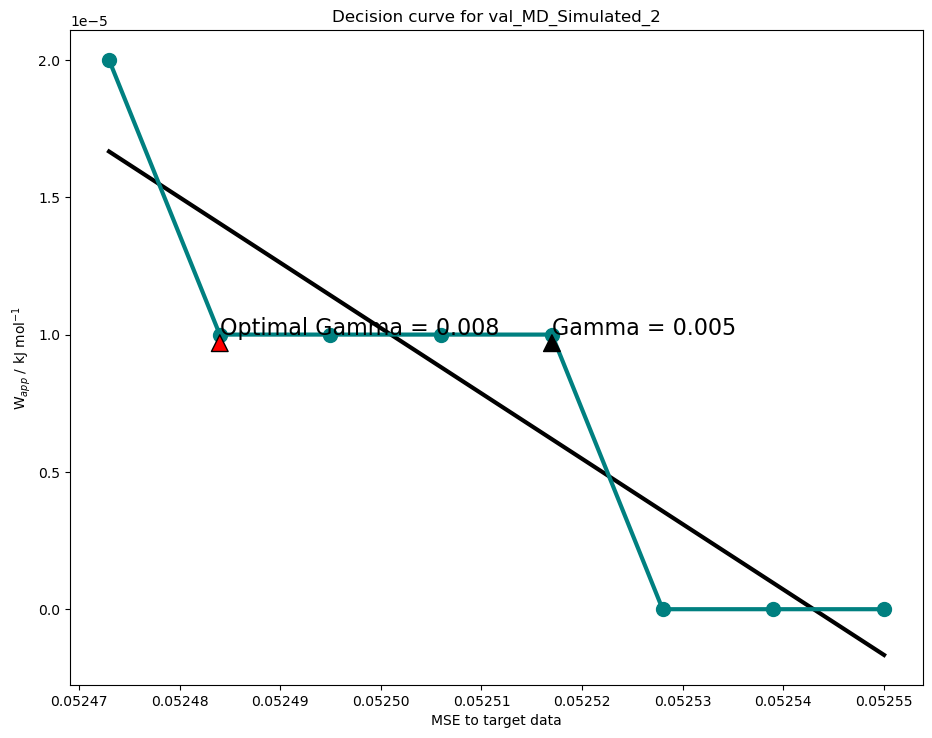

Optimal gamma for val_MD_Simulated_2 is 8x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_2/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0  120.0  peptide
0  0.05833  0.30224  0.97264    1.0        0
1  0.23877  0.80479  1.00000    1.0        1
2  0.99816  1.00000  1.00000    1.0        2
3  0.98578  1.00000  1.00000    1.0        3
4  0.02303  0.13020  0.75216    1.0        4
     0.167      1.0     10.0  120.0  peptide
0  0.05833  0.30224  0.97264    1.0        0
1  0.23877  0.80479  1.00000    1.0        1
2  0.99816  1.00000  1.00000    1.0        2
3  0.98578  1.00000  1.00000    1.0        3
4  0.02303  0.13020  0.75216    1.0        4
5  0.10536  0.48659  0.99873    1.0        5
6  0.89438  1.00000  1.00000    1.0        6
7  0.75170  0.99976  1.00000    1.0        7
     0.167      1.0     10.0  120.0  peptide           calc_name
0  0.05833  0.30224  0.97264  

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_3/train_MD_Simulated_3_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_3/out__train_MD_Simulated_3Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_3/reweighting_gamma_2x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_3/reweighting_gamma_3x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_3/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_3/reweighting_gamma_5x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_

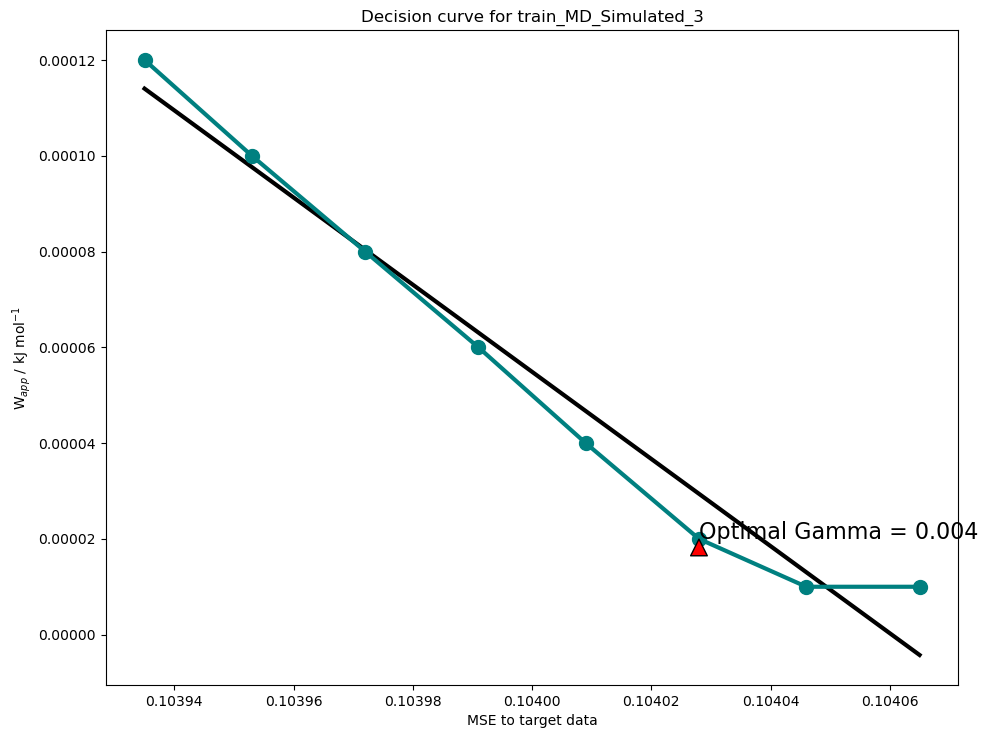

Optimal gamma for train_MD_Simulated_3 is 4x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_3/reweighting_gamma_4x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.06243  0.32024  0.97894  1.00000        0
1  0.96577  1.00000  1.00000  1.00000        1
2  0.00002  0.00009  0.00094  0.01127        2
3  0.71863  0.99950  1.00000  1.00000        3
4  0.00333  0.01980  0.18127  0.90928        4
      0.167      1.0     10.0    120.0  peptide
0   0.06243  0.32024  0.97894  1.00000        0
1   0.96577  1.00000  1.00000  1.00000        1
2   0.00002  0.00009  0.00094  0.01127        2
3   0.71863  0.99950  1.00000  1.00000        3
4   0.00333  0.01980  0.18127  0.90928        4
5   0.00000  0.00001  0.00007  0.00082        5
6   0.98580  1.00000  1.00000  1.00000        6
7   0.22821  0.78799  1.00000  1.00000        7
8   0.00536  0.03165  0.27506  0.97893        8
9  

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_3/val_MD_Simulated_3_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_3/out__val_MD_Simulated_3Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_3/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_3/reweighting_gamma_3x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_3/reweighting_gamma_2x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_3/reweighting_gamma_5x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_

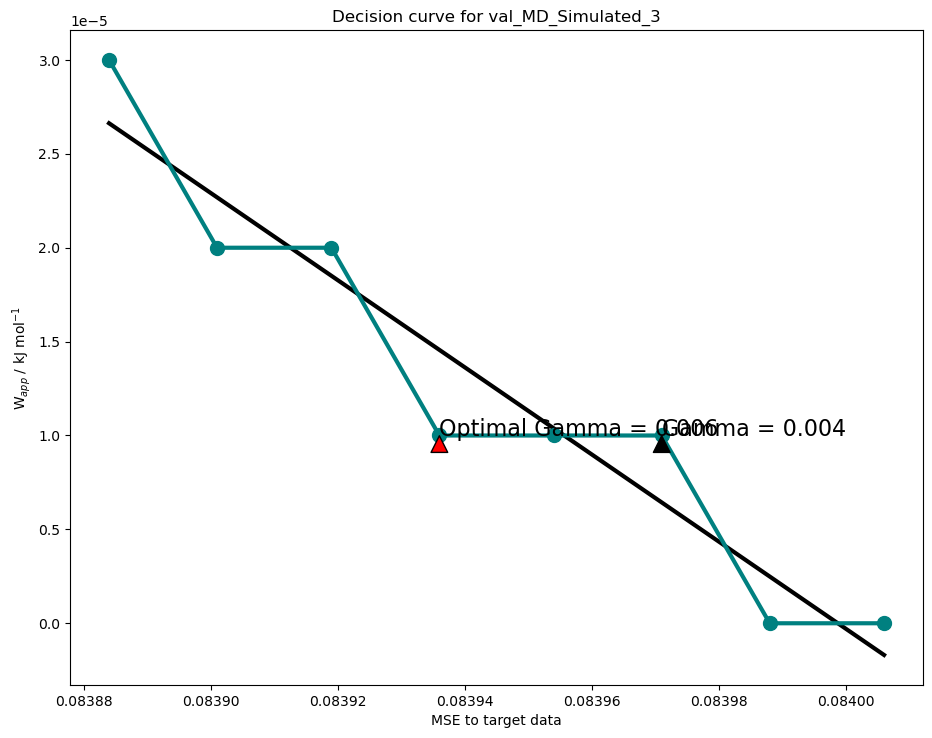

Optimal gamma for val_MD_Simulated_3 is 6x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_3/reweighting_gamma_4x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.16288  0.65513  0.99998  1.00000        0
1  0.00227  0.01354  0.12746  0.80527        1
2  0.00115  0.00686  0.06651  0.56216        2
3  0.13709  0.58641  0.99985  1.00000        3
4  0.00129  0.00772  0.07453  0.60524        4
     0.167      1.0     10.0    120.0  peptide
0  0.16288  0.65513  0.99998  1.00000        0
1  0.00227  0.01354  0.12746  0.80527        1
2  0.00115  0.00686  0.06651  0.56216        2
3  0.13709  0.58641  0.99985  1.00000        3
4  0.00129  0.00772  0.07453  0.60524        4
5  0.00082  0.00487  0.04766  0.44345        5
6  0.09433  0.44751  0.99735  1.00000        6
7  0.00370  0.02197  0.19919  0.93044        7
     0.167      1.0     10.0    120.0  peptide           calc_nam

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 4
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_4/train_MD_Simulated_4_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_4
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_4/out__train_MD_Simulated_4Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_4/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_4/reweighting_gamma_3x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_4/reweighting_gamma_2x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_4/reweighting_gamma_6x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_

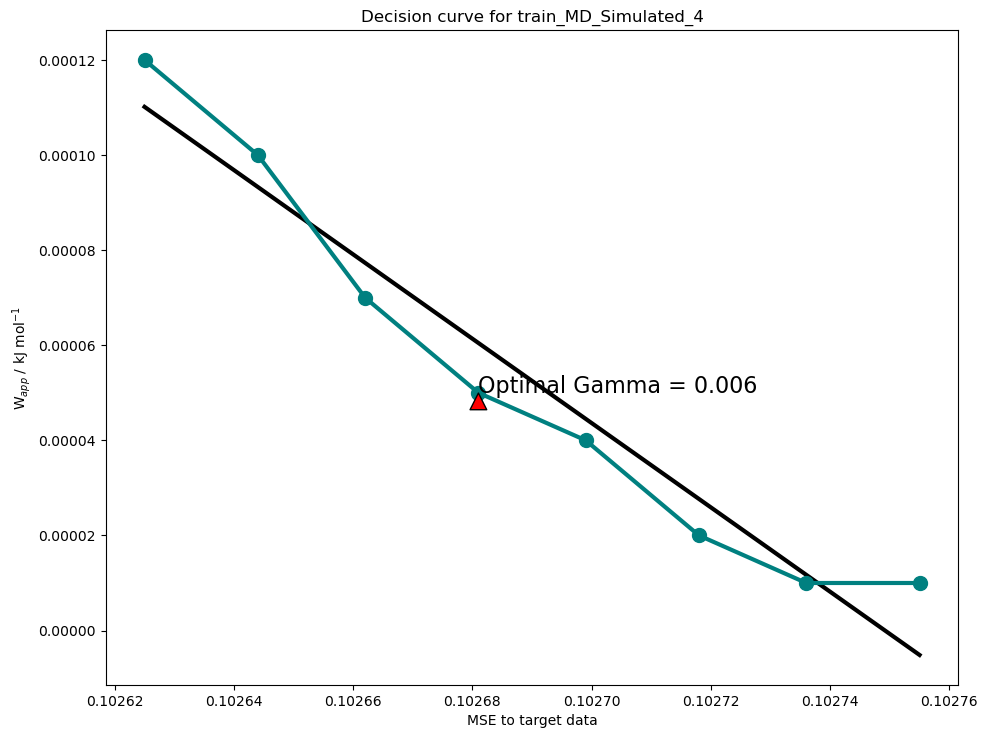

Optimal gamma for train_MD_Simulated_4 is 6x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_4/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.96573  1.00000  1.00000  1.00000        0
1  0.00061  0.00366  0.03604  0.35626        1
2  0.34711  0.92215  1.00000  1.00000        2
3  0.05835  0.30234  0.97268  1.00000        3
4  0.09428  0.44731  0.99734  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.96573  1.00000  1.00000  1.00000        0
1   0.00061  0.00366  0.03604  0.35626        1
2   0.34711  0.92215  1.00000  1.00000        2
3   0.05835  0.30234  0.97268  1.00000        3
4   0.09428  0.44731  0.99734  1.00000        4
5   0.31218  0.89364  1.00000  1.00000        5
6   0.20543  0.74766  1.00000  1.00000        6
7   0.00227  0.01354  0.12747  0.80530        7
8   0.09669  0.45607  0.99773  1.00000        8
9  

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 4
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_4/val_MD_Simulated_4_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_4
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_4/out__val_MD_Simulated_4Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_4/reweighting_gamma_2x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_4/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_4/reweighting_gamma_5x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_4/reweighting_gamma_6x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD

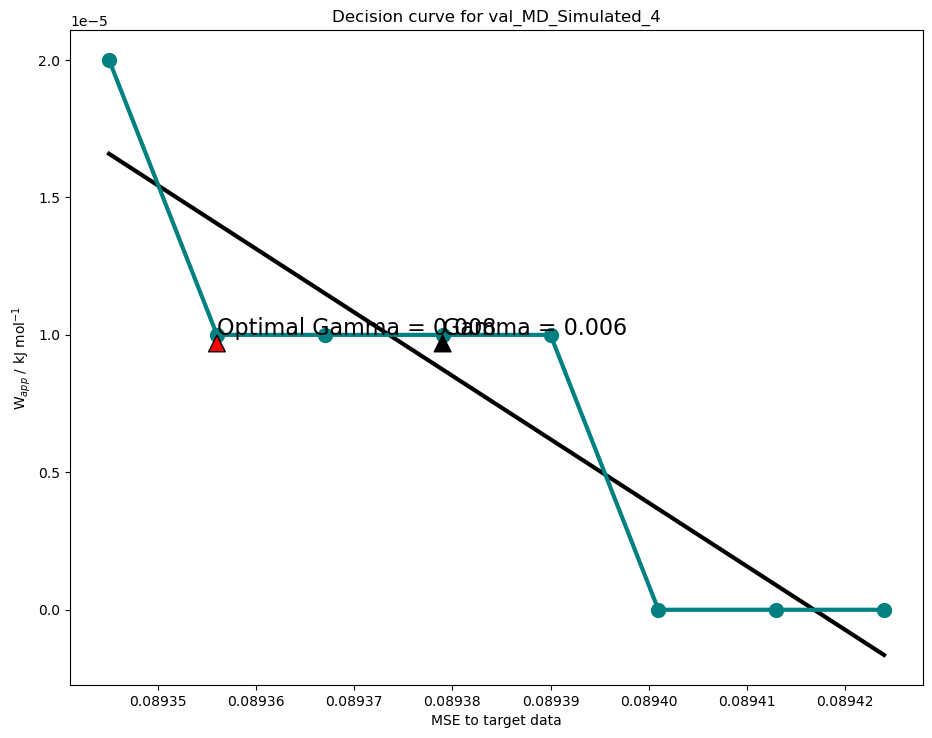

Optimal gamma for val_MD_Simulated_4 is 8x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_4/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.16285  0.65505  0.99998  1.00000        0
1  0.99817  1.00000  1.00000  1.00000        1
2  0.00002  0.00009  0.00094  0.01126        2
3  0.71887  0.99950  1.00000  1.00000        3
4  0.10537  0.48661  0.99873  1.00000        4
     0.167      1.0     10.0    120.0  peptide
0  0.16285  0.65505  0.99998  1.00000        0
1  0.99817  1.00000  1.00000  1.00000        1
2  0.00002  0.00009  0.00094  0.01126        2
3  0.71887  0.99950  1.00000  1.00000        3
4  0.10537  0.48661  0.99873  1.00000        4
5  0.75138  0.99976  1.00000  1.00000        5
6  0.34847  0.92312  1.00000  1.00000        6
7  0.00129  0.00771  0.07448  0.60497        7
     0.167      1.0     10.0    120.0  peptide           calc_nam

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 5
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_5/train_MD_Simulated_5_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_5
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_5/out__train_MD_Simulated_5Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_5/reweighting_gamma_3x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_5/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_5/reweighting_gamma_2x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_5/reweighting_gamma_5x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_

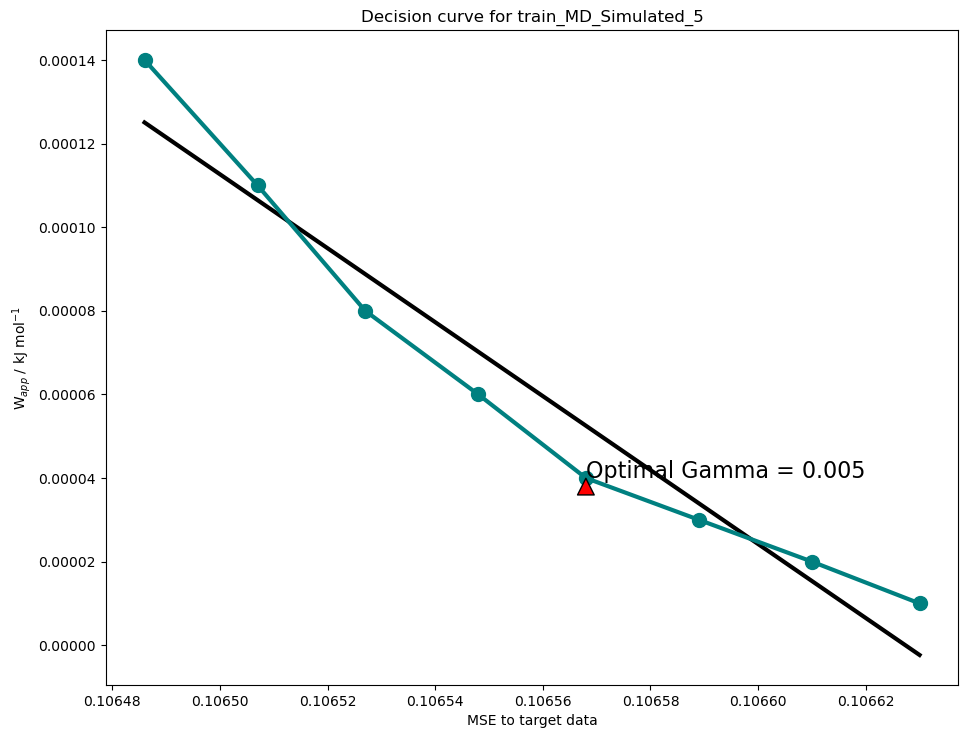

Optimal gamma for train_MD_Simulated_5 is 5x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/train_MD_Simulated_5/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.16285  0.65506  0.99998  1.00000        0
1  0.00262  0.01557  0.14523  0.84787        1
2  0.91126  1.00000  1.00000  1.00000        2
3  0.99817  1.00000  1.00000  1.00000        3
4  0.02303  0.13023  0.75224  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.16285  0.65506  0.99998  1.00000        0
1   0.00262  0.01557  0.14523  0.84787        1
2   0.91126  1.00000  1.00000  1.00000        2
3   0.99817  1.00000  1.00000  1.00000        3
4   0.02303  0.13023  0.75224  1.00000        4
5   0.00037  0.00222  0.02196  0.23392        5
6   0.20544  0.74768  1.00000  1.00000        6
7   0.00370  0.02194  0.19898  0.93023        7
8   0.34701  0.92208  1.00000  1.00000        8
9  

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 5
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_5/val_MD_Simulated_5_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_5
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_5/out__val_MD_Simulated_5Intrinsic_rates.dat
Trying concurrent.futures
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_5/reweighting_gamma_3x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_5/reweighting_gamma_2x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_5/reweighting_gamma_6x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_5/reweighting_gamma_4x10^-3/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_

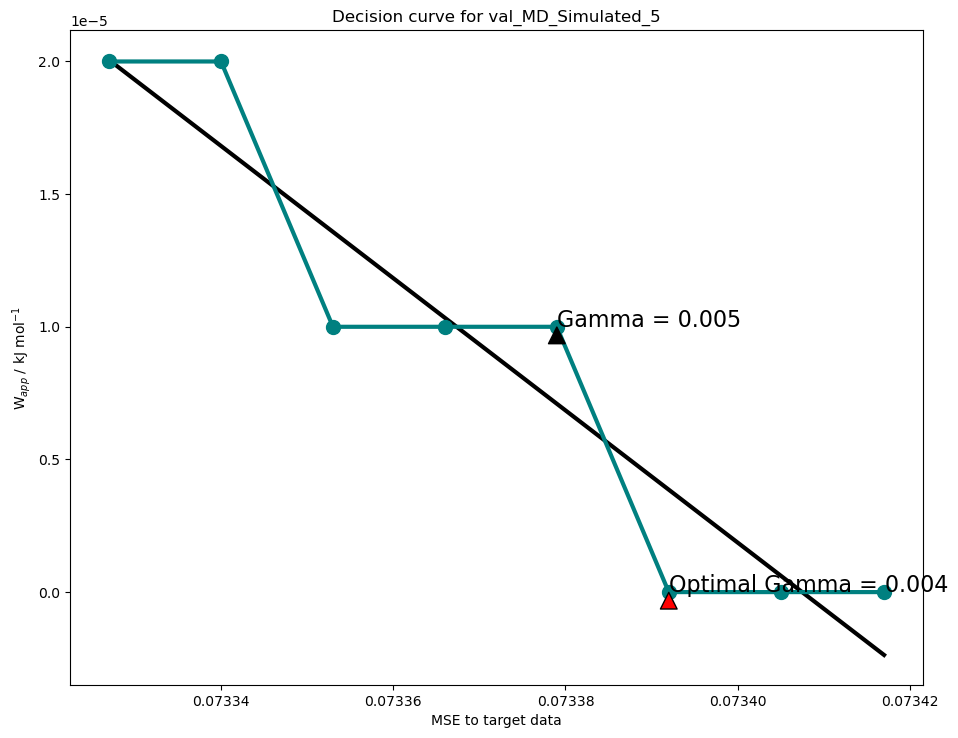

Optimal gamma for val_MD_Simulated_5 is 4x10^-3
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps/val_MD_Simulated_5/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.23863  0.80457  1.00000  1.00000        0
1  0.96585  1.00000  1.00000  1.00000        1
2  0.00002  0.00009  0.00094  0.01127        2
3  0.98580  1.00000  1.00000  1.00000        3
4  0.00536  0.03164  0.27496  0.97890        4
     0.167      1.0     10.0    120.0  peptide
0  0.23863  0.80457  1.00000  1.00000        0
1  0.96585  1.00000  1.00000  1.00000        1
2  0.00002  0.00009  0.00094  0.01127        2
3  0.98580  1.00000  1.00000  1.00000        3
4  0.00536  0.03164  0.27496  0.97890        4
5  0.05814  0.30139  0.97231  1.00000        5
6  0.89425  1.00000  1.00000  1.00000        6
7  1.00000  1.00000  1.00000  1.00000        7
     0.167      1.0     10.0    120.0  peptide           calc_nam

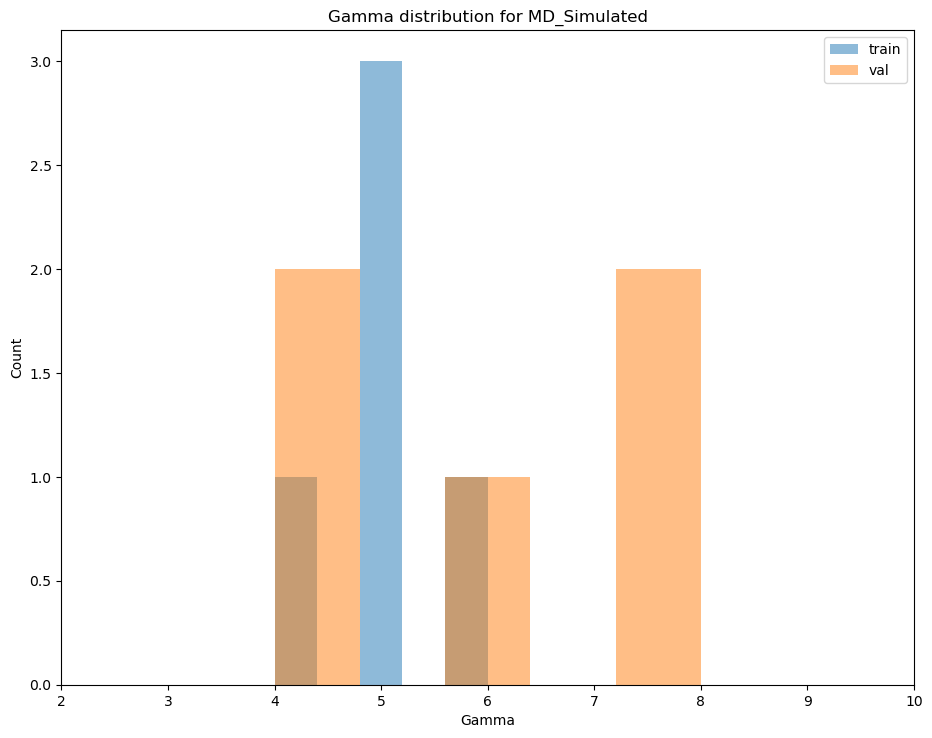

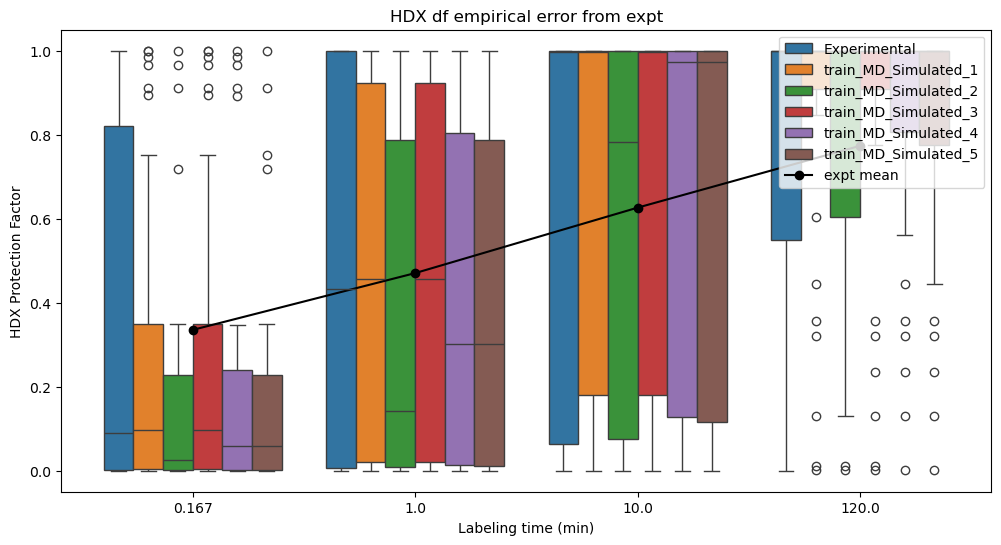

plot_dfracs_compare
       0.167      1.0     10.0   120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.0000        0        Experimental
1    0.09039  0.43293  0.99656  1.0000        1        Experimental
2    0.02665  0.14933  0.80157  1.0000        2        Experimental
3    0.18680  0.71010  1.00000  1.0000        3        Experimental
4    0.99880  1.00000  1.00000  1.0000        4        Experimental
..       ...      ...      ...     ...      ...                 ...
241  0.98580  1.00000  1.00000  1.0000        3  val_MD_Simulated_5
242  0.00536  0.03164  0.27496  0.9789        4  val_MD_Simulated_5
243  0.05814  0.30139  0.97231  1.0000        5  val_MD_Simulated_5
244  0.89425  1.00000  1.00000  1.0000        6  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.0000        7  val_MD_Simulated_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   0.09039  0.4

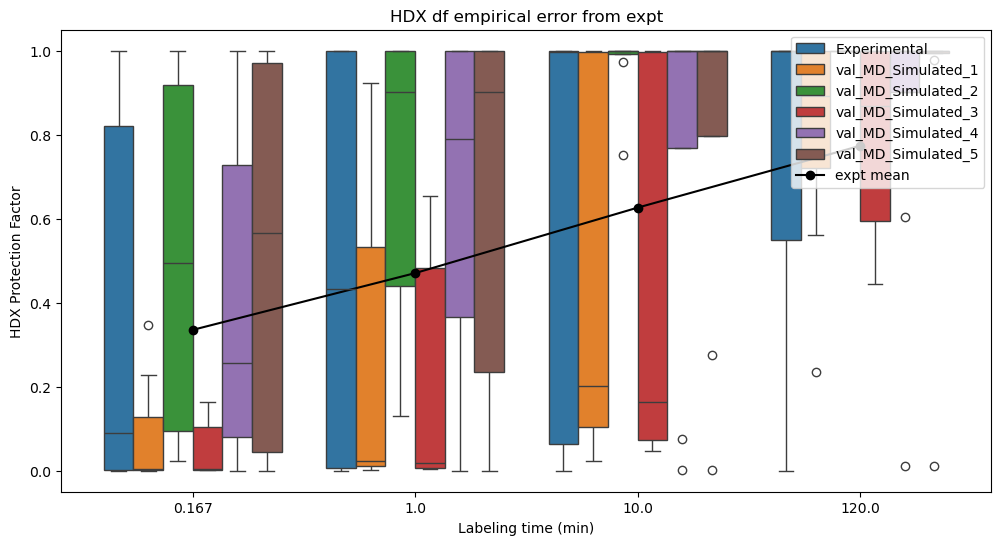

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0, 27, 5, 11, 1, 30, 21, 2, 31, 37, 3, 36, 23, 33]
val_rep_peptides [7, 10, 14, 18, 20, 22, 28, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40, 33, 32, 28, 34, 15, 1, 25, 11, 35, 18, 3, 39, 23]
val_rep_peptides [0, 2, 4, 16, 17, 21, 27, 30]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24, 30, 14, 1, 37, 4, 21, 13, 6, 29, 31, 7, 39, 25]
val_rep_peptides [3, 20, 22, 23, 32, 35, 38, 40]
train_rep_peptides [5, 13, 7, 0, 38, 26, 9, 20, 37, 40, 18, 19, 10, 24, 33, 16, 29, 34, 6, 17, 28, 2, 12, 39, 27, 36, 23, 8, 22, 25, 35, 14, 1]
val_rep_peptides [

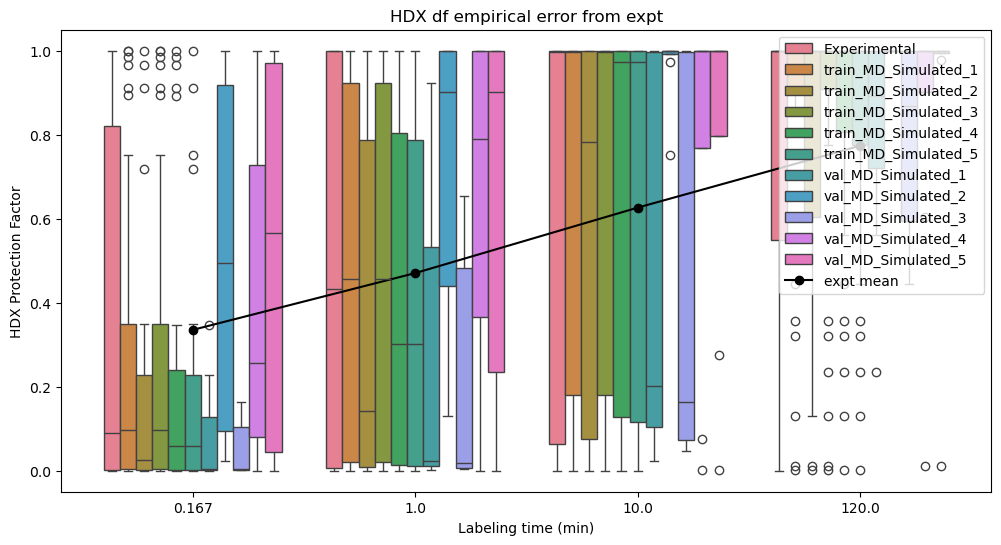

plotting paired errors
       0.167      1.0     10.0   120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.0000        0        Experimental
1    0.09039  0.43293  0.99656  1.0000        1        Experimental
2    0.02665  0.14933  0.80157  1.0000        2        Experimental
3    0.18680  0.71010  1.00000  1.0000        3        Experimental
4    0.99880  1.00000  1.00000  1.0000        4        Experimental
..       ...      ...      ...     ...      ...                 ...
241  0.98580  1.00000  1.00000  1.0000       16  val_MD_Simulated_5
242  0.00536  0.03164  0.27496  0.9789       18  val_MD_Simulated_5
243  0.05814  0.30139  0.97231  1.0000       19  val_MD_Simulated_5
244  0.89425  1.00000  1.00000  1.0000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.0000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.00039, 1.0, 0.43

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


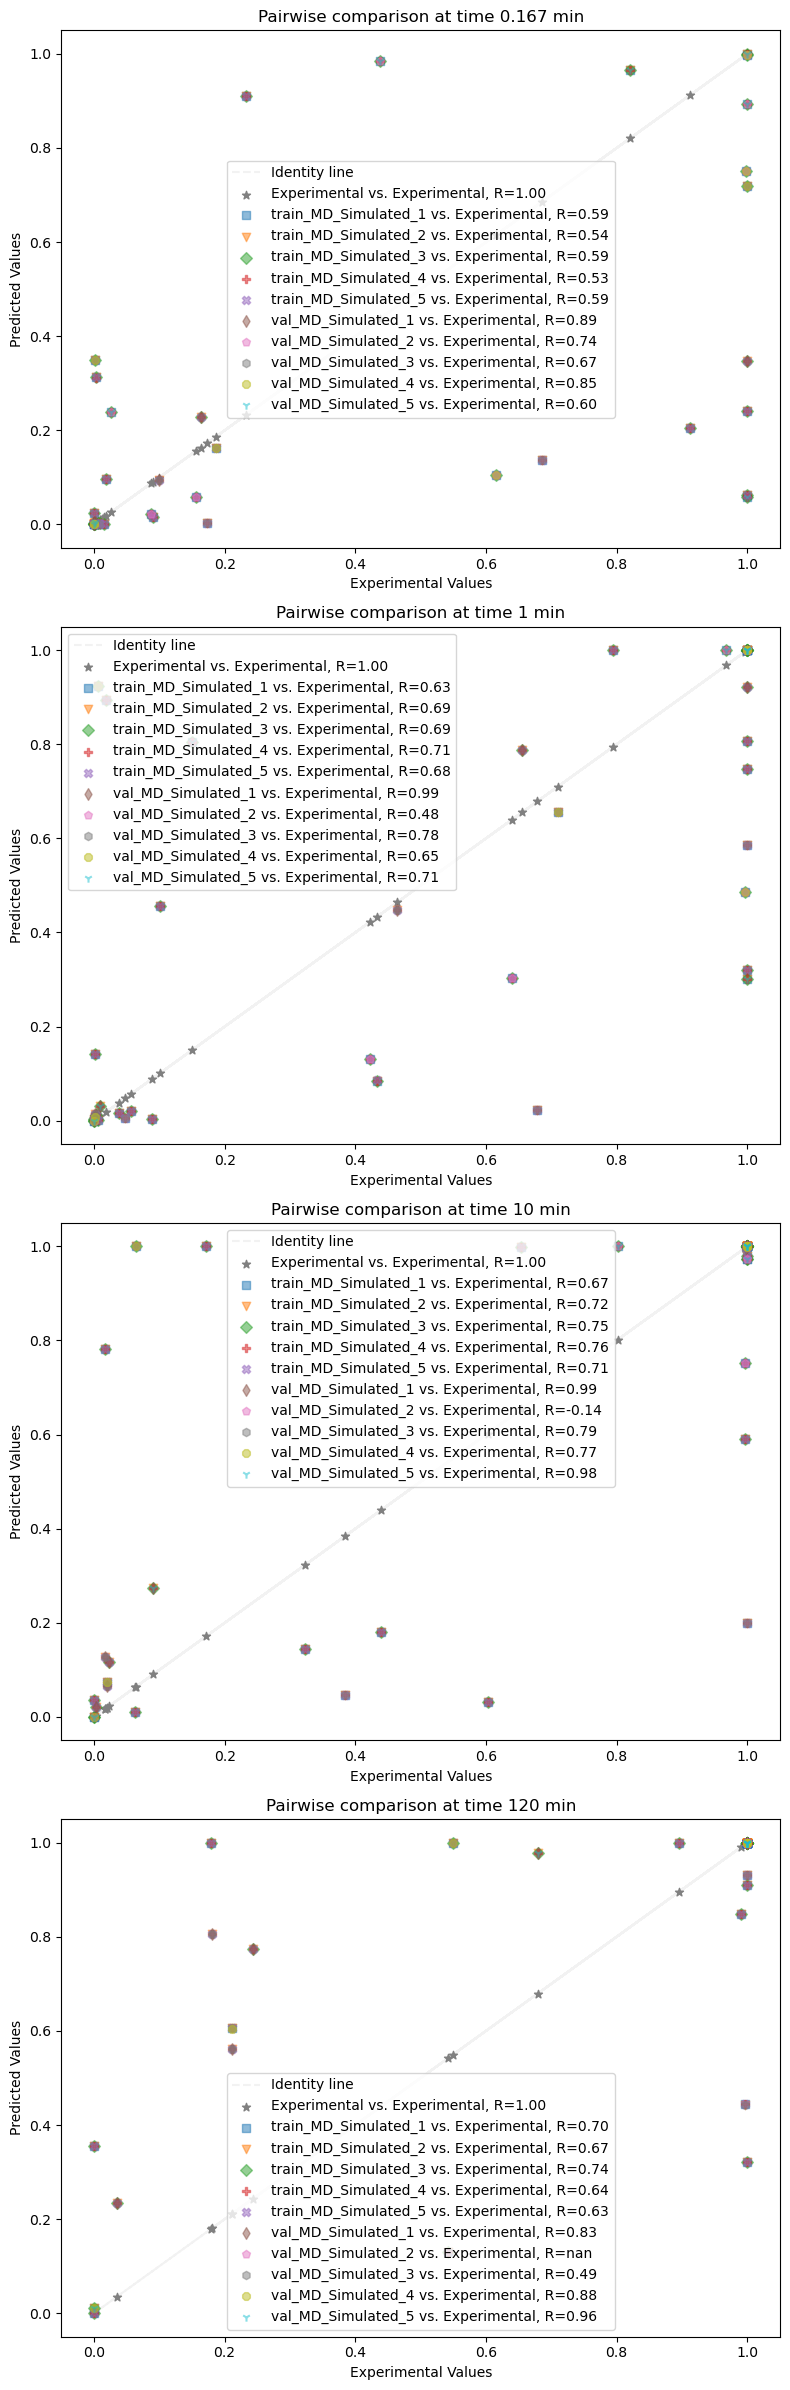

plotting paired trainval agreement
       0.167      1.0     10.0   120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.0000        0        Experimental
1    0.09039  0.43293  0.99656  1.0000        1        Experimental
2    0.02665  0.14933  0.80157  1.0000        2        Experimental
3    0.18680  0.71010  1.00000  1.0000        3        Experimental
4    0.99880  1.00000  1.00000  1.0000        4        Experimental
..       ...      ...      ...     ...      ...                 ...
241  0.98580  1.00000  1.00000  1.0000       16  val_MD_Simulated_5
242  0.00536  0.03164  0.27496  0.9789       18  val_MD_Simulated_5
243  0.05814  0.30139  0.97231  1.0000       19  val_MD_Simulated_5
244  0.89425  1.00000  1.00000  1.0000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.0000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1336: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1355: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFram

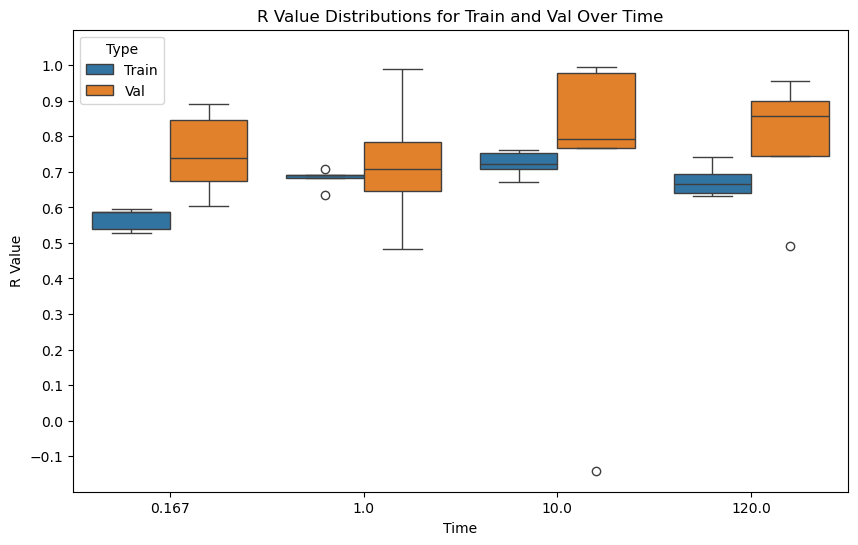

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00019  0.00116  0.01152  0.12978       24  train_MD_Simulated_1
1    0.00061  0.00366  0.03604  0.35629       13  train_MD_Simulated_1
2    0.02513  0.14136  0.78218  1.00000        8  train_MD_Simulated_1
3    0.00054  0.00323  0.03180  0.32144       25  train_MD_Simulated_1
4    0.99817  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
405  0.98580  1.00000  1.00000  1.00000       16    val_MD_Simulated_5
406  0.00536  0.03164  0.27496  0.97890       18    val_MD_Simulated_5
407  0.05814  0.30139  0.97231  1.00000       19    val_MD_Simulated_5
408  0.89425  1.00000  1.00000  1.00000       27    val_MD_Simulated_5
409  1.00000  1.00000  1.00000  1.00000       29    val_MD_Simulated_5

[410 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00019  0.00116  0.0115

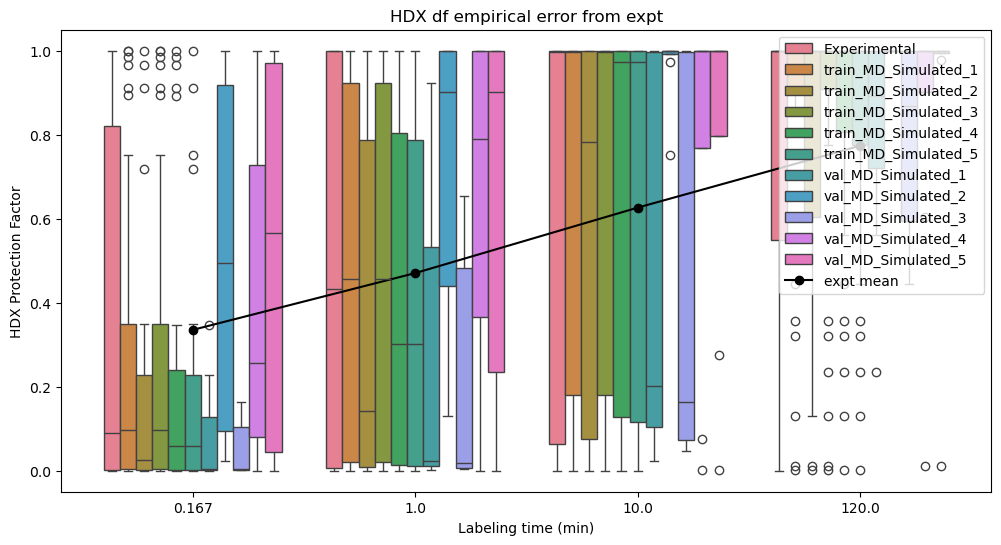

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00019  0.00116  0.01152  0.12978       24  train_MD_Simulated_1
1    0.00061  0.00366  0.03604  0.35629       13  train_MD_Simulated_1
2    0.02513  0.14136  0.78218  1.00000        8  train_MD_Simulated_1
3    0.00054  0.00323  0.03180  0.32144       25  train_MD_Simulated_1
4    0.99817  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
410  0.15669  0.63957  0.99996  1.000

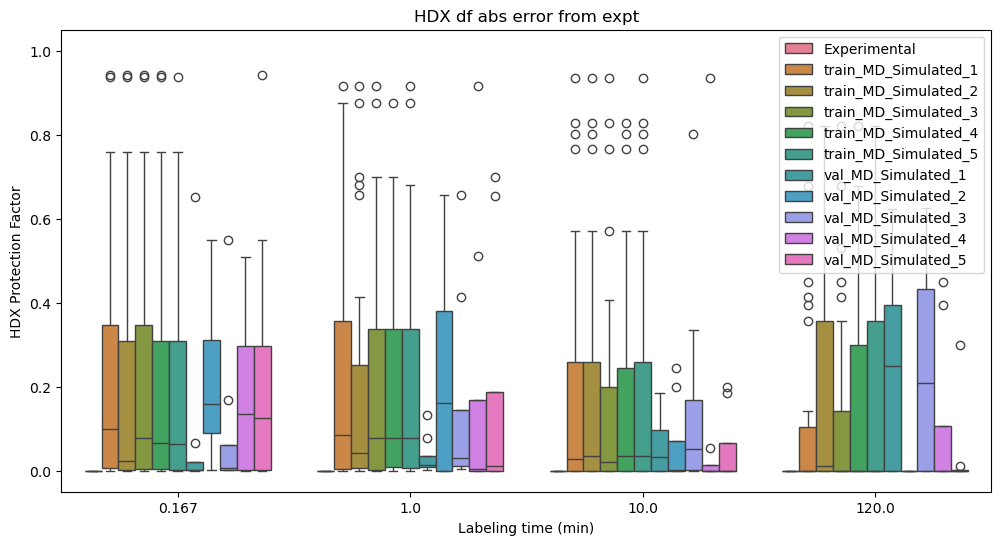

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00019  0.00116  0.01152  0.12978       24  train_MD_Simulated_1
1    0.00061  0.00366  0.03604  0.35629       13  train_MD_Simulated_1
2    0.02513  0.14136  0.78218  1.00000        8  train_MD_Simulated_1
3    0.00054  0.00323  0.03180  0.32144       25  train_MD_Simulated_1
4    0.99817  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
410  0.15669  0.63957  0.99996  1.000

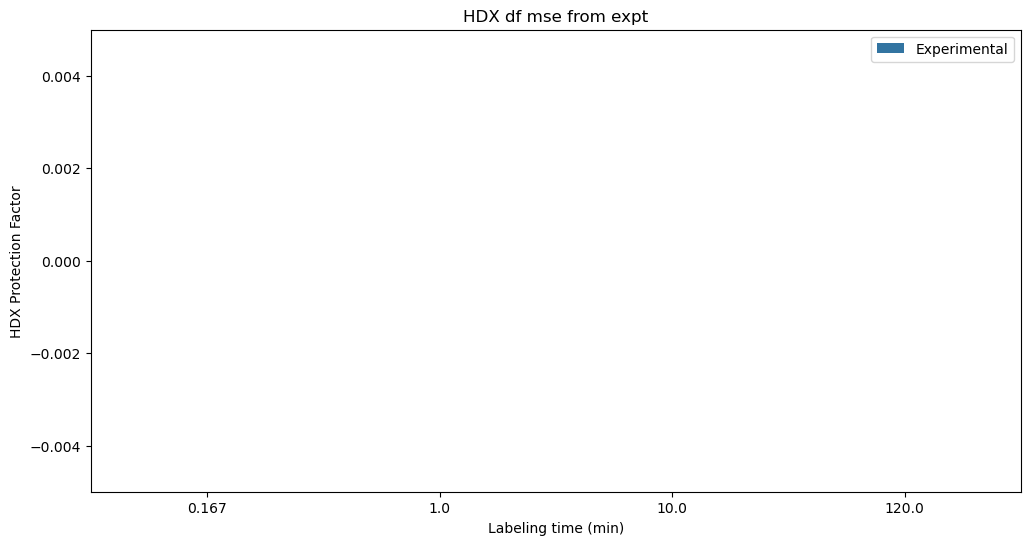

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00019  0.00116  0.01152  0.12978       24  train_MD_Simulated_1
1    0.00061  0.00366  0.03604  0.35629       13  train_MD_Simulated_1
2    0.02513  0.14136  0.78218  1.00000        8  train_MD_Simulated_1
3    0.00054  0.00323  0.03180  0.32144       25  train_MD_Simulated_1
4    0.99817  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


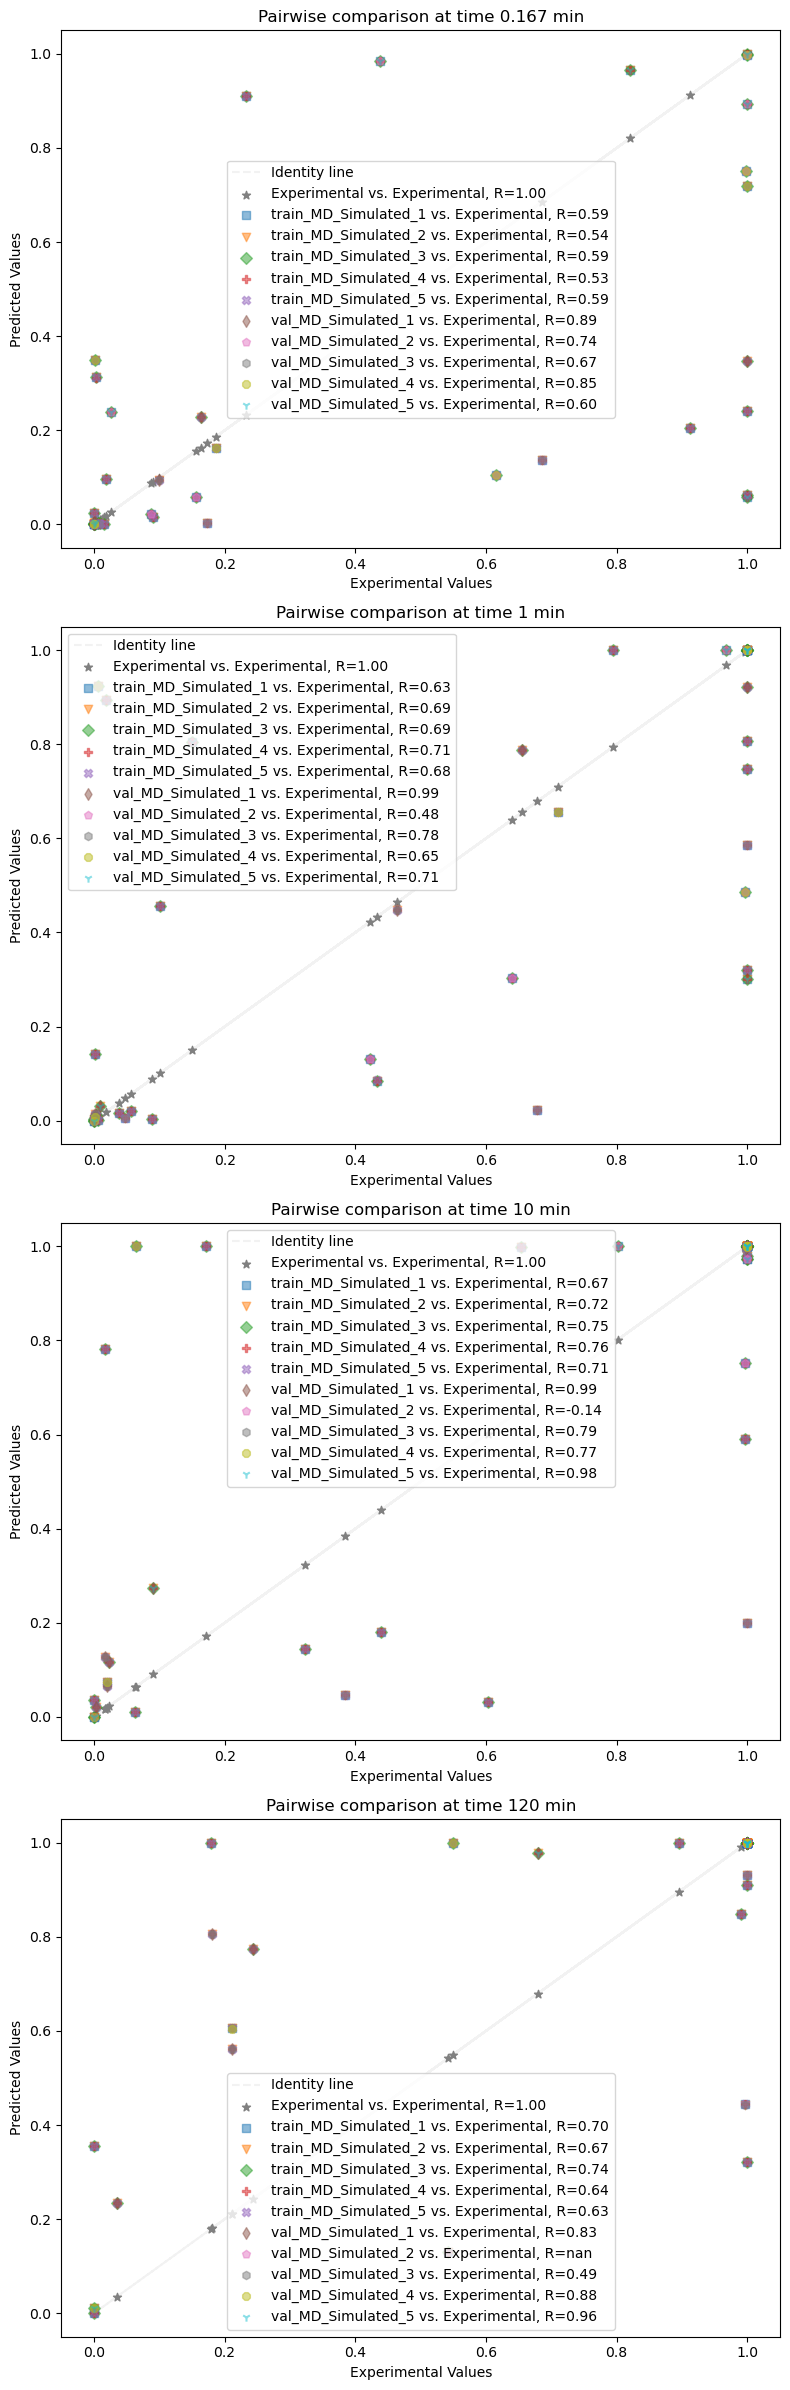

Train coverage: 100.00
Val coverage: 65.85
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
217  0.98578  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
218  0.98580  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
219  0.99816  1.00000  1.00000    1.0        4  val_MD_Simulated_avg
220  0.99817  1.00000  1.00000    1.0        4  val_MD_Simulated_avg
221  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[222 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0

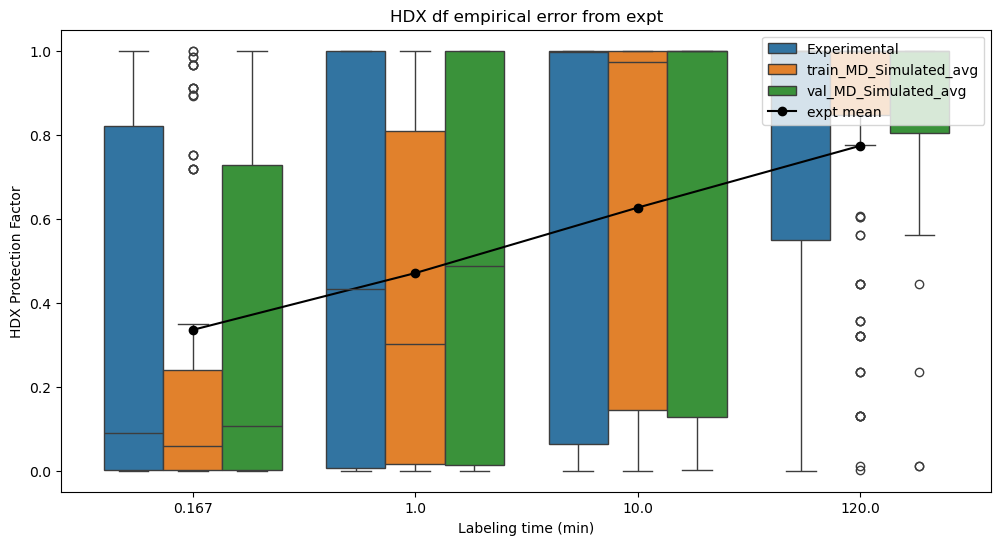

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
217  0.98578  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
218  0.98580  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
219  0.99816  1.00000  1.00000    1.0        4  val_MD_Simulated_avg
220  0.99817  1.00000  1.00000    1.0        4  val_MD_Simulated_avg
221  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[222 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

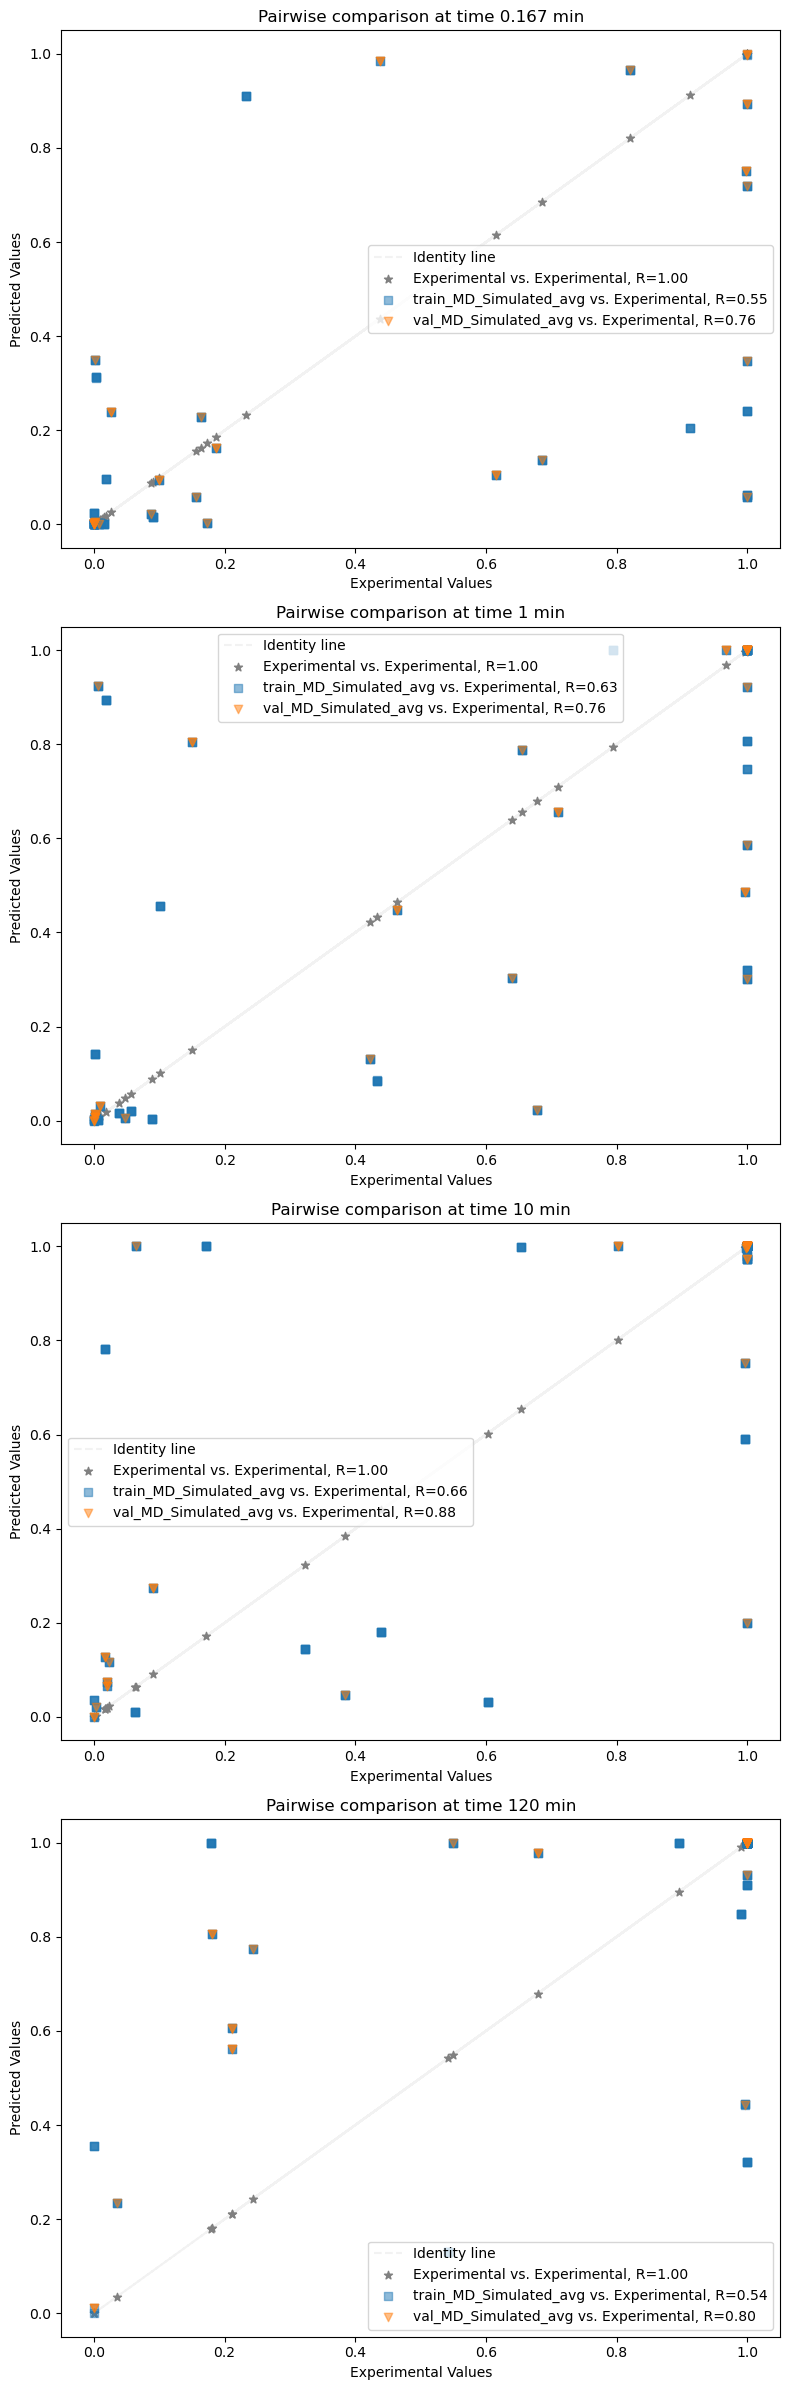

In [17]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [18]:
VDX.save_experiment()

dump = train_dfs, val_dfs, train_gammas, val_gammas

import pickle
with open(f'dump_{VDX.name}.pickle', 'wb') as f:
    print(f"Saving pickle", f'dump_{VDX.name}.pickle')
    pickle.dump(dump, f)

Saving experiment to:  logs/test_full0.5_celeste_stride100_413_5reps_1705582585.pkl
Saving pickle dump_test_full0.5_celeste_stride100_413_5reps.pickle


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:300: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [19]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
# VDX = VDX.load_experiment(load_path='logs/test_full0.50_1705421531.pkl')

In [ ]:
with open('dump_test_full0.50.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [ ]:
import pandas as pd

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()